In [2]:
#设计一个用于二分类的小型神经网络，结构如下：

#输入层：3个特征 (x₁, x₂, x₃)
#隐藏层：2个神经元，使用 ReLU 激活函数
#输出层：1个神经元，使用 Sigmoid 激活函数（二分类）

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#relu激活函数
def relu(a):
  return np.maximum(0, a)

In [5]:
#sigmoid激活函数
def sigmoid(a):
  return 1 / (1+np.exp(-a))

In [6]:
#前向传播,求输出y_pred
def forward(W1, W2, b1, b2, X):
  Z = np.dot(X, W1.T).T + b1 #shape(2,1)
  H = relu(Z) #shape (2,1)

  Zo = np.dot(W2, H) + b2 #shape (1,1)
  y_pred = sigmoid(Zo) #shape (1,1)

  return Z, H, Zo, y_pred

In [7]:
#求损失,los函数
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

In [8]:
#求反向传导, 梯度计算
def backward(y_pred, y_true, Z, H, W2, X):
  dy = y_pred - y_true #shape(1,1)
  #b2_grad = dy * Zo * (1-Zo) #shape (1,1) 这样写是不对的
  b2_grad = dy * y_pred * (1-y_pred) #shape (1,1)
  W2_grad = np.dot(b2_grad, H.T) #shape (1,2)

  dh = np.dot(W2.T, b2_grad) #shape (2,1)
  dz = dh * (Z>0) #shape (2,1)
  b1_grad = dz
  W1_grad = np.dot(dz ,X)

  return W1_grad, W2_grad, b1_grad, b2_grad

In [9]:
#更新参数,weight,bias
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate):
  W1 -= learning_rate * W1_grad
  W2 -= learning_rate * W2_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  return W1, W2, b1, b2

Epochs: 1 loss: [0.0669] W1_grad: [-0.02 -0.03 -0.05 -0.03 -0.05 -0.08] W2_grad: [-0.03 -0.11] b1_grad: [-0.02 -0.03] b2_grad: [-0.08]
Epochs: 11 loss: [0.0636] W1_grad: [-0.02 -0.03 -0.05 -0.03 -0.05 -0.08] W2_grad: [-0.03 -0.11] b1_grad: [-0.02 -0.03] b2_grad: [-0.08]
Epochs: 21 loss: [0.0603] W1_grad: [-0.02 -0.03 -0.05 -0.03 -0.05 -0.08] W2_grad: [-0.03 -0.11] b1_grad: [-0.02 -0.03] b2_grad: [-0.08]
Epochs: 31 loss: [0.0571] W1_grad: [-0.02 -0.03 -0.05 -0.03 -0.05 -0.08] W2_grad: [-0.03 -0.11] b1_grad: [-0.02 -0.03] b2_grad: [-0.08]
Epochs: 41 loss: [0.0541] W1_grad: [-0.02 -0.03 -0.05 -0.02 -0.05 -0.07] W2_grad: [-0.03 -0.11] b1_grad: [-0.02 -0.02] b2_grad: [-0.07]
Epochs: 51 loss: [0.0511] W1_grad: [-0.01 -0.03 -0.04 -0.02 -0.05 -0.07] W2_grad: [-0.03 -0.1 ] b1_grad: [-0.01 -0.02] b2_grad: [-0.07]
Epochs: 61 loss: [0.0483] W1_grad: [-0.01 -0.03 -0.04 -0.02 -0.05 -0.07] W2_grad: [-0.03 -0.1 ] b1_grad: [-0.01 -0.02] b2_grad: [-0.07]
Epochs: 71 loss: [0.0456] W1_grad: [-0.01 -0.03 -

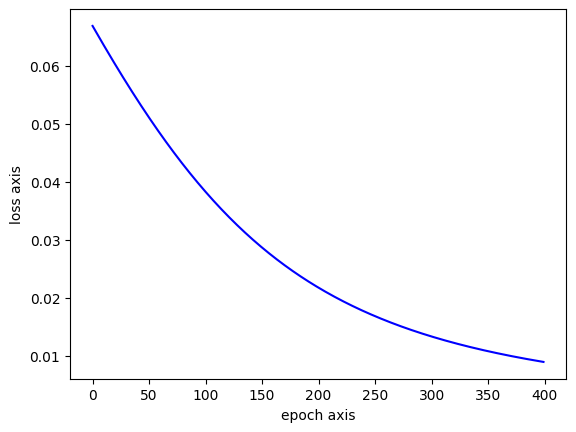

In [10]:
W1 = np.array([[0.1, 0.2, -0.1],   # 隐藏层第一个神经元的权重
    [0.3, 0.1, 0.2]])   #ndarray (2,3) 隐藏层第二个神经元的权重

b1 = np.array([[0.1],    # 隐藏层第一个神经元的偏置
    [0.2]])    #ndarray (2,1) 隐藏层第二个神经元的偏置

W2 = np.array([[0.2, 0.3]])  #shape (1,2) 输出层神经元的权重

b2 = np.array([[0.1]])    #shape (1,1) 输出层神经元的偏置

X = np.array([[1, 2, 3]])  #shape (1,3) 一个样本，3个特征
y_true = np.array([[1]])    #y_true (1,1) 真实标签

learning_rate = 0.01

epochs = 400

losses = []

for epoch in range(epochs):
  Z, H, Zo, y_pred = forward(W1, W2, b1, b2, X)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss.flatten())

  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, Z, H, W2, X)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate)

  if(epoch%10 == 0):
    print("Epochs:", epoch + 1,
      "loss:", np.round(loss.flatten(), 4),
      "W1_grad:", np.round(W1_grad.flatten(), 2),
      "W2_grad:", np.round(W2_grad.flatten(), 2),
      "b1_grad:", np.round(b1_grad.flatten(), 2),
      "b2_grad:", np.round(b2_grad.flatten(), 2)
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()